Here is a forcing function for Poisson's equation.

In [1]:
f(x,y) = x^2 - y + 2;

We pick a crude discretization for illustrative purposes.

In [2]:
include("../FNC.jl")
m = 5;  n = 6;
X,Y,d = FNC.rectdisc(m,[0,3],n,[-1,1]);

Next, we evaluate $f$ on the grid.

In [3]:
F = f.(X,Y);      

Here are the equations for the PDE collocation, before any modifications are made for the boundary conditions.

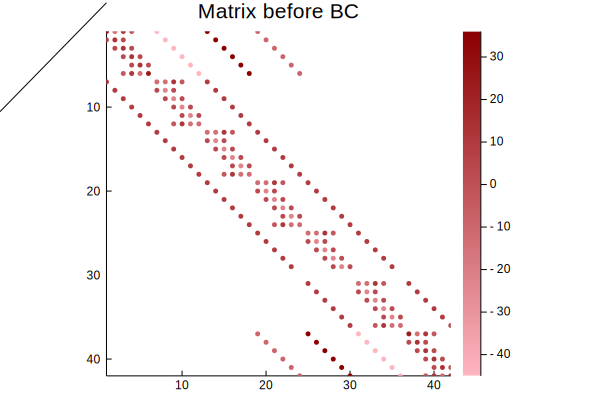

In [4]:
A = kron(d.Iy,d.Dxx) + kron(d.Dyy,d.Ix);

using Plots,SparseArrays
spy(sparse(A),m=3,color=:reds,title="Matrix before BC")

In [5]:
b = d.vec(F);
@show N = length(b);

N = length(b) = 42


The array `d.isbndy` is Boolean and the same size as `X`, `Y`, and `F`.

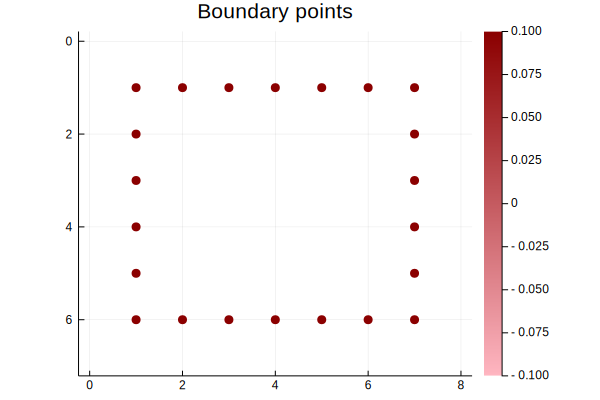

In [6]:
spy(sparse(d.isbndy),m=5,color=:reds,title="Boundary points")
plot!([],label="",grid=:xy,xaxis=([0,8]),yaxis=([0,7]))

Next replace the boundary rows of the system by rows of the identity.

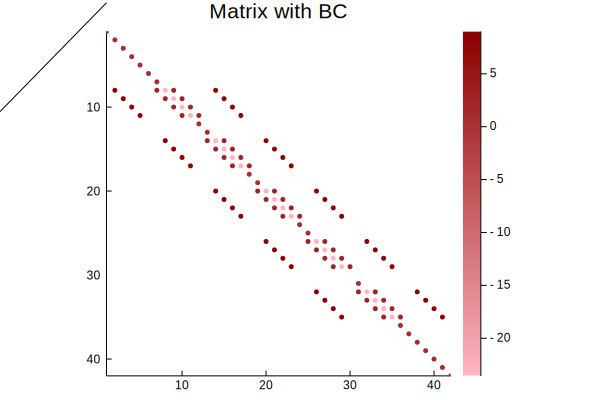

In [7]:
I = spdiagm(0=>ones(size(A,1)))
A[d.isbndy[:],:] = I[d.isbndy[:],:]   # Dirichlet conditions
spy(sparse(A),m=3,color=:reds,title="Matrix with BC")    

Finally, we must replace the rows in the vector $\mathbf{b}$ by the boundary values being assigned to the boundary points. Here, we let the boundary values be zero everywhere. 

In [8]:
b[d.isbndy[:]] .= 0;                 # Dirichlet values

Now we can solve for $\mathbf{u}$ and reinterpret it as the matrix-shaped $\mathbf{U}$, the solution on our grid. This grid is much too coarse for the result to look like a smooth function of two variables.

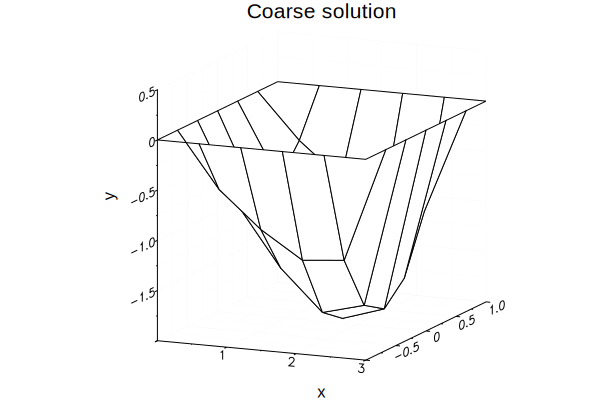

In [9]:
u = A\b;
U = d.unvec(u);

wireframe(X[:,1],Y[1,:],U,match_dimensions=true,
    xaxis=("x"),yaxis=("y"),zaxis=("u(x,y)"),title="Coarse solution")